In [1]:
import sys
sys.path.append('/home') 
import arpespythontools as arp 
from matplotlib import rcParamsDefault 
from matplotlib.ticker import AutoMinorLocator

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update(rcParamsDefault)
large = 22; med = 16; #small = 12
params = {'legend.fontsize': med,
      'figure.figsize': (8, 6),
      'axes.labelsize': med,
      'axes.titlesize': med,
      'xtick.labelsize': med,
      'ytick.labelsize': med,
      'figure.titlesize': large,
      'image.origin': 'lower',
      'xtick.major.size': 8,
      'ytick.major.size': 8,
      'xtick.major.width': 1,
      'ytick.major.width': 1,
      'xtick.minor.size': 4,
      'xtick.minor.width': 1,
      'ytick.minor.size': 4,
      'ytick.minor.width': 1,
      'axes.linewidth': 1,
      'font.family': 'sans-serif', 
      'font.sans-serif' : 'Open Sans',
      'font.weight': 'light', # ultralight, light, regular, medium, bold 
      'font.style': 'normal', # normal, italic
         }
plt.rcParams.update(params)
plt.rcParams['figure.facecolor'] = 'white'
# plt.rcParams['figure.dpi'] = 150

In [2]:
url = 'https://pranabdas.github.io/drive/datasets/arpes/sample_spectrum.txt'
# url = '/Users/Pranab/Desktop/drive/datasets/arpes/sample_spectrum.txt'
data, energy, angle = arp.load_ses_spectra(url)

In [5]:
def laplacian(data, bw=5, w='default'):
    import numpy as np
    from astropy.convolution import convolve, Box2DKernel
    # https://docs.astropy.org/en/latest/api/astropy.convolution.Box2DKernel.html

    if (w=='default'):
        w = data.shape[0]/data.shape[1]

    data_smth = convolve(data, Box2DKernel(bw))

    # remove the borders
    bo = int(bw/2 + 1)
#     data_smth = data_smth[bo:-bo, bo:-bo]
#     x = x[bo:-bo]
#     y = y[bo:-bo]diff2[ii][jj] = np.average(data_smth)

    # Laplacian
    diff2 = np.gradient(np.gradient(data_smth, axis=0), axis=0) + \
        w*w*np.gradient(np.gradient(data_smth, axis=1), axis=1)
    
    # NaN wrapping for edges
    for ii in range(data.shape[0]):
        for jj in range(data.shape[1]):
            if (ii <= bo+1 or ii >= data.shape[0]-bo-1 or \
                jj <= bo+1 or jj >= data.shape[1]-bo-1):
                diff2[ii][jj] = np.nan

    return diff2

In [6]:
diff2 = laplacian(data)

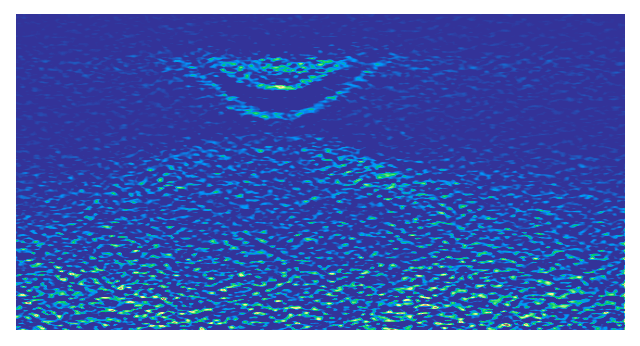

In [7]:
plt.imshow(diff2, vmax=0, cmap='terrain_r')
plt.axis('off')
plt.show()

In [8]:
import numpy as np

diff2[np.isnan(diff2)] = 0